## **Load data**

### **Import libraries**

In [1]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### **Import dataset**

In [2]:
dataset = pd.read_csv('samples.csv')

### **View the dataset**

In [3]:
dataset.shape

(2429, 140)

In [4]:
dataset.head()

,filename,group,race,age,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,x9,y9,x10,y10,x11,y11,x12,y12,x13,y13,x14,y14,x15,y15,x16,y16,x17,y17,...,x48,y48,x49,y49,x50,y50,x51,y51,x52,y52,x53,y53,x54,y54,x55,y55,x56,y56,x57,y57,x58,y58,x59,y59,x60,y60,x61,y61,x62,y62,x63,y63,x64,y64,x65,y65,x66,y66,x67,y67
0,pictures/control/black/0-1/1_1_1_2017010919471...,control,black,0-1,47,127,50,143,53,158,56,174,63,188,75,198,91,206,108,212,125,214,143,213,159,206,174,198,185,187,191,173,195,158,198,142,200,127,63,110,...,102,172,114,168,124,165,129,166,134,165,143,167,155,172,143,176,135,176,129,176,124,177,114,176,106,172,124,171,129,171,134,171,150,172,134,172,129,172,124,172
1,pictures/control/black/0-1/1_1_1_2017010919461...,control,black,0-1,66,116,69,132,72,147,77,161,85,174,97,183,111,189,124,193,136,194,148,190,159,183,171,175,180,164,186,151,188,137,190,122,191,106,73,113,...,111,171,120,168,127,165,132,166,137,164,145,166,155,167,146,173,139,176,134,177,128,177,121,175,115,171,127,169,133,169,138,168,151,167,138,169,133,170,128,170
2,pictures/control/black/0-1/1_0_1_2017011021283...,control,black,0-1,61,115,63,131,67,147,71,163,79,176,91,186,105,192,118,198,130,201,144,199,159,193,174,186,186,176,194,163,199,147,201,130,203,111,69,108,...,111,178,117,172,122,168,126,170,130,168,138,173,146,180,138,185,131,186,127,186,122,185,117,183,115,177,122,175,126,175,130,175,142,179,130,177,126,177,122,176
3,pictures/control/black/0-1/1_1_1_2017010919462...,control,black,0-1,62,116,65,131,69,146,74,160,81,172,92,181,104,188,116,194,129,196,141,195,152,189,163,182,173,172,180,160,184,146,188,132,189,116,73,107,...,110,171,118,168,125,165,129,166,133,165,140,168,148,171,140,176,134,178,129,178,125,177,118,175,114,171,125,170,129,170,133,170,144,171,133,170,129,171,125,170
4,pictures/control/black/0-1/1_1_1_2017010919124...,control,black,0-1,49,130,52,147,55,165,59,180,67,194,81,205,99,211,114,217,129,219,143,216,156,209,169,201,179,189,185,175,187,160,187,145,187,129,69,113,...,104,177,112,166,123,160,131,162,139,160,147,166,153,178,147,188,139,191,131,192,123,192,112,188,107,176,124,166,131,167,139,167,149,177,139,183,131,184,123,183


### **Preparing the data**

In [5]:
# temp = dataset.iloc[:, 4:]
# X = pd.DataFrame() # inputs
# for i in range(int(temp.shape[1]/2)): # tuple of points
#   X[str(i)] = dataset[['x'+str(i), 'y'+str(i)]].apply(tuple, axis=1)
X = dataset.iloc[:, 4:]
y = dataset.iloc[:, 1] # labels

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## **Decision Trees for Classification**

### **Training and making predictions**

In [7]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [8]:
y_pred = classifier.predict(X_test)

### **Evaluate the algorithm**

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
mtx = confusion_matrix(y_test, y_pred)
mtx

array([[134,  21],
       [ 20, 311]])

Text(0.5, 257.44, 'Predicted label')

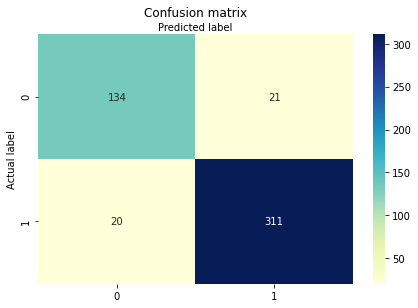

In [10]:
# visually display confusion matrix
class_names=['cchs', 'control'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(mtx), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        cchs       0.87      0.86      0.87       155
     control       0.94      0.94      0.94       331

    accuracy                           0.92       486
   macro avg       0.90      0.90      0.90       486
weighted avg       0.92      0.92      0.92       486



## **Binary Logistic Regression**

### **Training and making predictions**

In [12]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [13]:
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
y_pred = logreg.predict(X_test)

### **Evaluate the algorithm**

In [15]:
from sklearn import metrics
mtx = metrics.confusion_matrix(y_test, y_pred)
mtx

array([[135,  20],
       [ 57, 274]])

Text(0.5, 257.44, 'Predicted label')

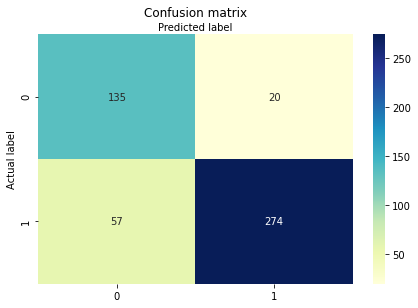

In [17]:
# visually display confusion matrix
class_names=['cchs', 'control'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(mtx), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        cchs       0.70      0.87      0.78       155
     control       0.93      0.83      0.88       331

    accuracy                           0.84       486
   macro avg       0.82      0.85      0.83       486
weighted avg       0.86      0.84      0.85       486

